## Лабораторная 4. Пространственная фильтрация

In [6]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Полный снимок скелета, полученный с помощью гамма-лучей.

In [2]:
original = cv2.imread("1.jpg")

In [4]:
def showImage(imageArray, size=(20,20), colorMap = 'gray'):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest', cmap = colorMap)
    plt.show()

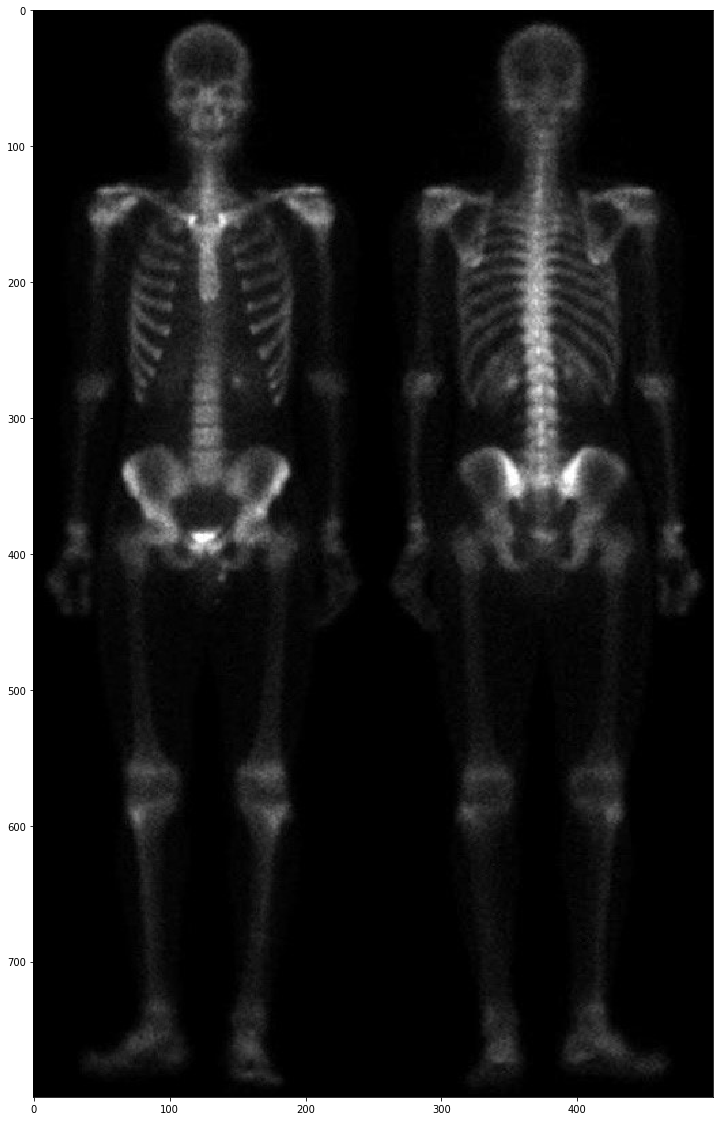

In [8]:
showImage(original)

### Применение оператора лапласиана к изображению.

In [9]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

def transformCircle(image, kerner, border):
    img = cv2.GaussianBlur(image,(kerner, kerner), border)
    showImage(img)

interact(transformCircle, image=fixed(gray), kerner=(0, 50), border=(0, 500))

interactive(children=(IntSlider(value=25, description='kerner', max=50), IntSlider(value=250, description='bor…

<function __main__.transformCircle(image, kerner, border)>

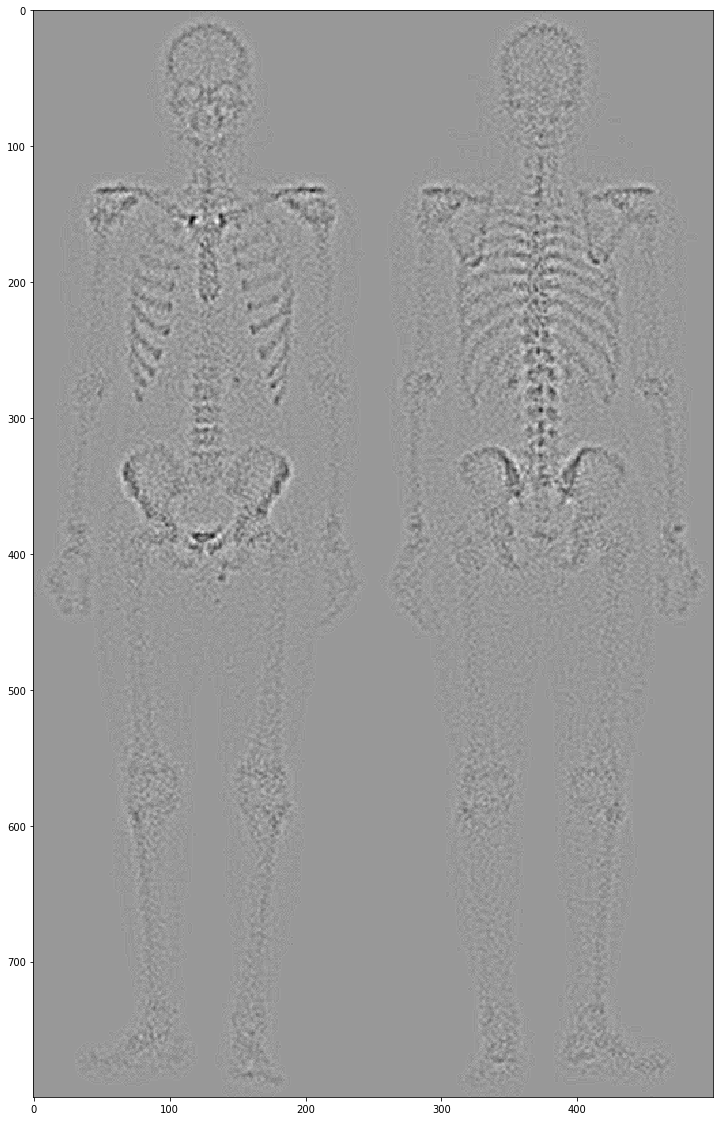

In [20]:
imgGray = cv2.GaussianBlur(gray,(5,5), 0)
laplacian = cv2.Laplacian(imgGray, 6)
showImage(laplacian)

### Повышение резкости сложением изображений.

In [2]:
from io import BytesIO
from skimage import io
from PIL import Image, ImageDraw
from skimage import img_as_float
import numpy as np
import cv2

image = io.imread('1.jpg')

width = image.shape[0]
height = image.shape[1]
print(cv2.CV_64F)

6


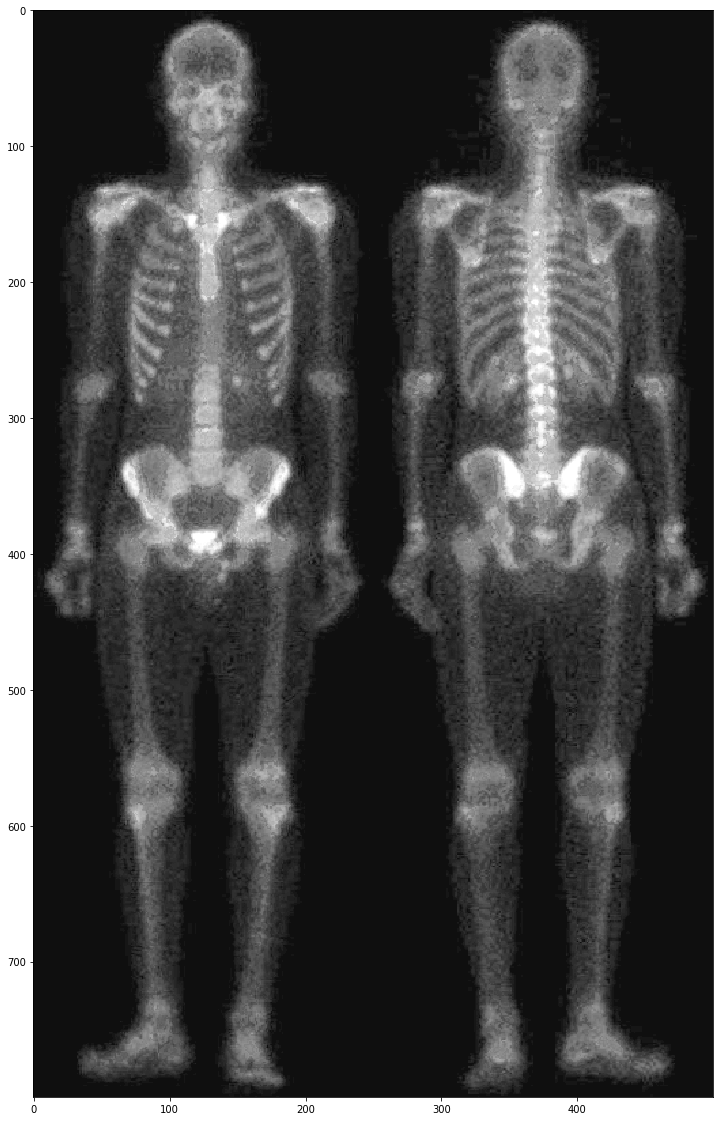

In [8]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)

sobelxy = cv2.addWeighted(sobelx, 1, sobely, 1, 1)

image_lapl = cv2.Laplacian(image, cv2.CV_64F)

Imin = np.max(image_lapl)
Imax = np.min(image_lapl)

Omin, Omax = 0, 255
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
out = a * image_lapl + b
out = out.astype(np.uint8)

image_sum = image + out
image_sum = cv2.addWeighted(out, 0, image, 1, 0.0)

mean_image = cv2.blur(sobelxy, (5,5))

mask_image = image.copy()
mask_image = cv2.bitwise_and(mean_image, image_sum, mask = None)

image_prelast = cv2.addWeighted(image, 1, mask_image, 0.4, 1.0)

gamma = 0.5
image_last = np.array(255*(image_prelast / 255) ** gamma, dtype = 'uint8')
#showImage(out)
#showImage(image_last)
#showImage(sobelxy)
#showImage(image_sum)
#showImage(mean_image)
#showImage(image_prelast)
showImage(image_last)
#image_last = cv2.GaussianBlur(image_last, (5,5), 0)